In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data

In [83]:
mnistData = load_data()
(x_train,y_train),(x_test,y_test) = mnistData

In [12]:
len(np.unique(y_train))

10

In [84]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000, 28, 28)


In [85]:

x_trainR=x_train.reshape(-1,28*28)
x_testR=x_test.reshape(-1,28*28)
y_trainOHE = tf.keras.utils.to_categorical(y_train)
y_testOHE = tf.keras.utils.to_categorical(y_test)

```
1. 케라스버전
=> f1_score(train,test)
=> confusion matrix(trian,test)

2. 파이토치 하이(클래스기반)
=> f1_score(train,test)
=> confusion matrix(trian,test)
```

In [41]:
# 1. 케라스버전
# => f1_score(train,test)
# => confusion matrix(trian,test)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_dim=(28*28)))
model.add(tf.keras.layers.Dense(32, activation='relu', input_dim=(128)))
model.add(tf.keras.layers.Dense(10, activation='softmax',input_dim=(10)))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc']
)

model.fit(x_trainR, y_trainOHE, epochs=10 ,)

Epoch 1/10
   8/1875 [..............................] - ETA: 14s - loss: 48.8103 - acc: 0.2656 

2022-12-05 15:33:14.234903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 13s 7ms/step - loss: 1.5726 - acc: 0.5202
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.0131 - acc: 0.5876
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8068 - acc: 0.7062
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6911 - acc: 0.7472
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6175 - acc: 0.7760
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5422 - acc: 0.8149
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5039 - acc: 0.8322
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4897 - acc: 0.8379
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4626 - acc: 0.8447
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4386 - acc: 0.8516


In [45]:
model_tf = model

In [42]:
y_train_pred=model.predict(x_trainR)
y_test_pred=model.predict(x_testR)

  88/1875 [>.............................] - ETA: 3s

2022-12-05 15:35:19.149311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 89/313 [=======>......................] - ETA: 0s

2022-12-05 15:35:22.676845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


train_data
f1_score : 0.85835
accuracy : 0.8606


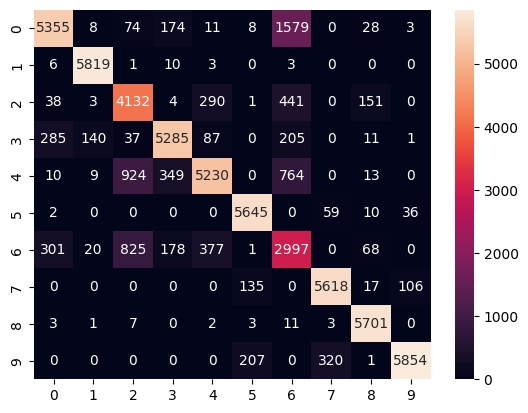

------------------------------
test_data
f1_score : 0.83394
accuracy : 0.836


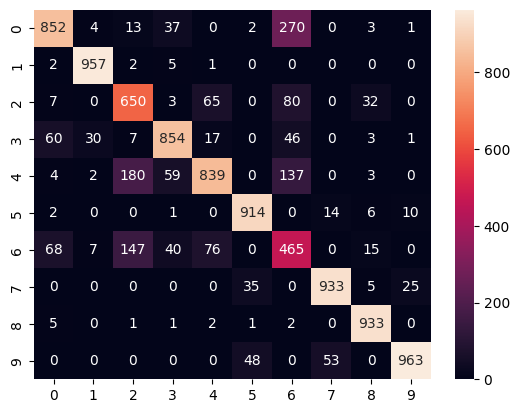

In [50]:
print('train_data')
f1_train = round(f1_score(y_train_pred.argmax(axis=1),y_train,average='macro'),5)
print(f'f1_score : {f1_train}')
acc_train = round(accuracy_score(y_train_pred.argmax(axis=1),y_train),5)
print(f'accuracy : {acc_train}')
sns.heatmap(
    confusion_matrix(y_train_pred.argmax(axis=1),y_train),
    annot=True,
    fmt='d'
)
plt.show()
print('-'*30)
print('test_data')
f1_test = round(f1_score(y_test_pred.argmax(axis=1),y_test,average='macro'),5)
print(f'f1_score : {f1_test}')
acc_test = round(accuracy_score(y_test_pred.argmax(axis=1),y_test),5)
print(f'accuracy : {acc_test}')
sns.heatmap(
    confusion_matrix(y_test_pred.argmax(axis=1),y_test),
    annot=True,
    fmt='d'
)
plt.show()

In [86]:
# 2. 파이토치 하이(클래스기반)
# => f1_score(train,test)
# => confusion matrix(trian,test)

import torch
from torch.optim import Adam
from torch.nn import Linear, Sequential, Module, CrossEntropyLoss, Softmax, ReLU

class MultiClass(Module):
    """
    mutli_classification
    fashion_mnist => flatten (28*28)
    (28*28) => (128)
    (128) => (64)
    (64) => (10)
    """
    def __init__(self) -> None:
        super().__init__()    
        self.nn1 = Linear(28*28,128)
        self.nn2 = Linear(128,64)
        self.nn3 = Linear(64,10)
        self.relu1 = ReLU()
        self.relu2 = ReLU()
        self.sm1 = Softmax(dim=1)
    def forward(self, x):
        x = self.nn1(x)
        x = self.relu1(x)
        
        x = self.nn2(x)
        x = self.relu1(x)
        
        x = self.nn3(x)
        x = self.sm1(x)
        return x
    
x_train_tensor = torch.FloatTensor(x_trainR)
x_test_tensor = torch.FloatTensor(x_testR)

y_train_tensor = torch.FloatTensor(y_trainOHE)
y_test_tensor = torch.FloatTensor(y_testOHE)


model = MultiClass()
loss_fn = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

for epoch in range(2000):
    optimizer.zero_grad()
    x_hat = model(x_train_tensor)
    cost = loss_fn(x_hat,y_train_tensor)
    cost.backward()
    optimizer.step()
    acc = accuracy_score(
        x_hat.argmax(axis=1).detach().numpy(),
        y_train_tensor.argmax(axis=1).detach().numpy()
    )
    print(f'epoch => {epoch} / cost => {cost.item()} / acc => {acc}')

epoch => 0 / cost => 2.354764223098755 / acc => 0.0902
epoch => 1 / cost => 2.220047950744629 / acc => 0.23651666666666665
epoch => 2 / cost => 2.18806529045105 / acc => 0.26953333333333335
epoch => 3 / cost => 2.118947744369507 / acc => 0.34103333333333335
epoch => 4 / cost => 2.0668563842773438 / acc => 0.39198333333333335
epoch => 5 / cost => 2.069368600845337 / acc => 0.3902
epoch => 6 / cost => 2.077955484390259 / acc => 0.38171666666666665
epoch => 7 / cost => 2.050847291946411 / acc => 0.4091
epoch => 8 / cost => 2.045229911804199 / acc => 0.41463333333333335
epoch => 9 / cost => 2.0359911918640137 / acc => 0.42418333333333336
epoch => 10 / cost => 2.0347254276275635 / acc => 0.4251
epoch => 11 / cost => 2.0354161262512207 / acc => 0.4249
epoch => 12 / cost => 2.0213382244110107 / acc => 0.43921666666666664
epoch => 13 / cost => 2.019357204437256 / acc => 0.44128333333333336
epoch => 14 / cost => 2.019821882247925 / acc => 0.4408
epoch => 15 / cost => 2.018165349960327 / acc => 

train_data
f1_score : 0.83236
accuracy : 0.87227


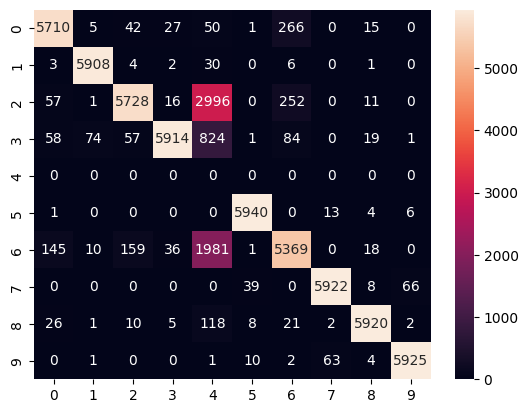

------------------------------
test_data
f1_score : 0.78422
accuracy : 0.8197


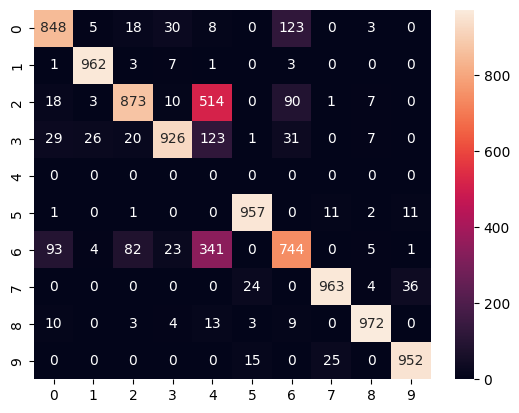

------------------------------


In [87]:
print('train_data')
f1_train = round(f1_score(x_hat.argmax(axis=1).detach().numpy(),y_train,average='macro'),5)
print(f'f1_score : {f1_train}')
acc_train = round(accuracy_score(x_hat.argmax(axis=1).detach().numpy(),y_train),5)
print(f'accuracy : {acc_train}')
sns.heatmap(
    confusion_matrix(x_hat.argmax(axis=1).detach().numpy(),y_train),
    annot=True,
    fmt='d'
)
plt.show()
print('-'*30)
x_hat = model(x_test_tensor)
print('test_data')
f1_test = round(f1_score(x_hat.argmax(axis=1).detach().numpy(),y_test,average='macro'),5)
print(f'f1_score : {f1_test}')
acc_test = round(accuracy_score(x_hat.argmax(axis=1).detach().numpy(),y_test),5)
print(f'accuracy : {acc_test}')
sns.heatmap(
    confusion_matrix(x_hat.argmax(axis=1).detach().numpy(),y_test),
    annot=True,
    fmt='d'
)
plt.show()
print('-'*30)